In [1]:
# Swapnil Saha Shawon (2022533042)
# Tamanna Rahman (2021450642)
# Syeda Mashiat Tabassum (2031356642)

In [3]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Load the data sets
X = np.load("/content/handsignX.npy")
y = np.load("/content/handsigny.npy")
# Checking the elements
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

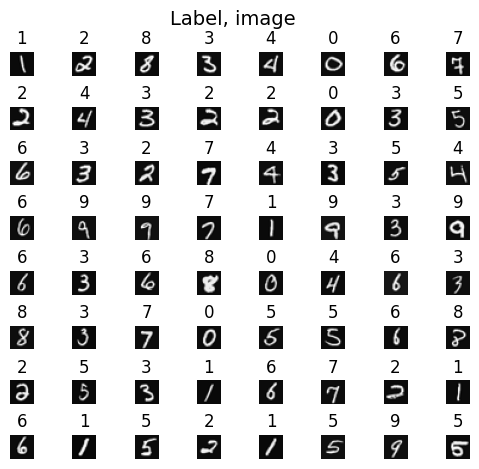

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


# Splitting the data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Applying PCA and selecting k using the validation set
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)

# Selecting the optimal number of components k
accuracy_scores = []
for k in range(1, X_train_pca.shape[1] + 1):
    X_train_pca_k = X_train_pca[:, :k]
    X_val_pca_k = X_val_pca[:, :k]

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca_k, y_train)
    y_val_pred = knn.predict(X_val_pca_k)
    accuracy_scores.append(accuracy_score(y_val, y_val_pred))

# Selecting k with the highest validation accuracy
k_optimal = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Optimal number of PCA components: {k_optimal}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Optimal number of PCA components: 38


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# List of classifiers
classifiers = {
    'Neural Network': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

# Helper function to train and evaluate classifiers
def train_evaluate(classifiers, X_train, y_train, X_val, y_val):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        results[name] = accuracy_score(y_val, y_pred)
    return results

# Training and evaluating on original data
results_original = train_evaluate(classifiers, X_train_std, y_train,
                                  X_val_std, y_val)

# Reducing the test data using the optimal number of PCA components
X_val_pca = pca.transform(X_val_std)[:, :k_optimal]
X_train_pca_optimal = X_train_pca[:, :k_optimal]

# Training and evaluating on PCA-reduced data
results_pca = train_evaluate(classifiers, X_train_pca_optimal, y_train,
                             X_val_pca, y_val)

# Comparing results
import pprint
print("Results on Original Data:")
pprint.pprint(results_original)
print("\nResults on PCA-Reduced Data:")
pprint.pprint(results_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Results on Original Data:
{'Naive Bayes': 0.612,
 'Neural Network': 0.9233333333333333,
 'SVM': 0.9133333333333333,
 'k-NN': 0.892}

Results on PCA-Reduced Data:
{'Naive Bayes': 0.658,
 'Neural Network': 0.9266666666666666,
 'SVM': 0.914,
 'k-NN': 0.9113333333333333}


In [7]:
#load the new dataset
N = np.load("/content/new_dataset.npy")

#creating y array for the new dataset
import numpy as np

# Define the total number of rows and the number of unique values
total_rows = 200
num_unique_values = 10  # Number of unique values

# Create an array with the desired shape
yN = np.zeros((total_rows, 1), dtype = int)

# Assign values to each group of rows
for i in range(num_unique_values):
    start_index = i * 20
    end_index = (i + 1) * 20
    yN[start_index:end_index, :] = i  # Assign the value 'i' to the corresponding group of rows

# Print the array to verify the result
print(yN[25])

[1]


In [9]:
# Standardizing the full dataset and the new dataset

# Fit the scaler on the training and new data and transform it
X_std = scaler.fit_transform(X)
N_std = scaler.fit_transform(N)

# Applying PCA and selecting k
X_pca = pca.fit_transform(X_std)
N_pca = pca.fit_transform(N_std)

# Selecting the optimal number of components k
accuracy_scores = []
for k in range(1, X_pca.shape[1] + 1):
    X_pca_k = X_pca[:, :k]

    # Example using a simple classifier
    knn = KNeighborsClassifier()
    knn.fit(X_pca_k, y)
    y_pred = knn.predict(X_pca_k)
    accuracy_scores.append(accuracy_score(y, y_pred))

# Selecting k with the highest validation accuracy
k_optimal = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Optimal number of PCA components: {k_optimal}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Optimal number of PCA components: 74


In [10]:
# Helper function to train and evaluate classifiers
def train_evaluate(classifiers, X, y, N, yN):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X, y)
        yN_pred = clf.predict(N)
        results[name] = accuracy_score(yN, yN_pred)
    return results

# Training and evaluating on original data
results_original = train_evaluate(classifiers, X_std, y,
                                  N_std, yN)

# Reducing the test data using the optimal number of PCA components
N_pca = pca.transform(N_std)[:, :k_optimal]
X_pca_optimal = X_pca[:, :k_optimal]

# Training and evaluating on PCA-reduced data
results_pca = train_evaluate(classifiers, X_pca_optimal, y,
                             N_pca, yN)

# Comparing results
import pprint
print("Results on Original Data:")
pprint.pprint(results_original)
print("\nResults on PCA-Reduced Data:")
pprint.pprint(results_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Results on Original Data:
{'Naive Bayes': 0.105, 'Neural Network': 0.08, 'SVM': 0.105, 'k-NN': 0.13}

Results on PCA-Reduced Data:
{'Naive Bayes': 0.07, 'Neural Network': 0.085, 'SVM': 0.08, 'k-NN': 0.07}
